# Applied Data Science Capstone Project



# Extending Bakery Business in Hamburg


# 1. introduction

The project consists of supporting the stakeholders of a small Bakery franchise to extend their business in Hamburg. By leveraging the Foursquare location data, Hamburg neighborhood will be investigated based on their similar characteristics and availability of Bakeries and cafes. 
 
Besides, available data on the Hamburg population by districts, as well as, it population density will support the selection of the most promising region for the new business.

# 2. Data Description

Two sets of data are required for this project. The first set of data consists of the information of Hamburg neighborhoods and their geographical location. Such information is available at  https://www.geonames.org/postal-codes/DE/HH/hamburg.html. 

These data will be scraped and combined with the population per hamburg neighborhood data at https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs.

Finally, the districts of Hamburg will be classified based on their similarities using Foursquare location data and the most promising district will be selected based on their population information, as well as, quantity of bakeries and cafes.


# 3. Data scraping


## 3.1 Importing libraries 
First the libraries required for data scrapping and processing are imported

In [1]:
#importing required libraries

import pandas as pd # library to process data as dataframes
from pandas.io.html import read_html

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

## 3.2 Hamburg data



### 3.2.1 Importing hamburg geo data 
The information list of hamburg districts was imported from https://www.geonames.org/postal-codes/DE/HH/hamburg.html

Importing table from website:

In [2]:
path = 'https://www.geonames.org/postal-codes/DE/HH/hamburg.html'

restable = read_html(path,  attrs={"class":"restable"})
print ("Extracted {num} restabl".format(num=len(restable)))

Extracted 1 restabl


printing table head:

In [3]:
df=restable[0]
df.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3,Admin4
0,1.0,Hamburg,20095,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"
1,NaN,53.552/10,53.552/10,53.552/10,53.552/10,53.552/10,53.552/10,53.552/10
2,2.0,Hamburg,20097,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"
3,NaN,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019
4,3.0,Hamburg,20099,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"


Assining pair indexes to df1, which contain information on hamburg neighborhoods

In [4]:
df1 = df[::2] 
df1.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3,Admin4
0,1.0,Hamburg,20095,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"
2,2.0,Hamburg,20097,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"
4,3.0,Hamburg,20099,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"
6,4.0,Hamburg,20146,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"
8,5.0,Hamburg,20148,Germany,Hamburg,NaN,"Hamburg, Freie und Hansestadt","Hamburg, Freie und Hansestadt"


Rows containing only hamburg were deleted since it reflects only Hamburg latitude and longitue, not assigned for a neighborhood

In [5]:
df2 = df1.iloc[97:401, 0:3]
df2.reset_index(inplace=True)
df2.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)
df2.replace(regex=['Hamburg'], value=' ', inplace=True)
df2.head(10)

,Place,Code
0,Harburg,21073
1,Harburg,21079
2,Tonndorf,22045
3,Uhlenhorst,22085
4,,22115
5,,22417
6,Ottensen,22765
7,Altstadt,20095
8,EimsbÃ¼ttel,20144
9,Eppendorf,20249


Assining pair indexes to df1, which contain information on hamburg neighborhoods

In [6]:
df3 = df[1::2] 
df3.reset_index(inplace=True)
df3.head()

,index,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3,Admin4
0,1,NaN,53.552/10,53.552/10,53.552/10,53.552/10,53.552/10,53.552/10,53.552/10
1,3,NaN,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019,53.548/10.019
2,5,NaN,53.558/10.011,53.558/10.011,53.558/10.011,53.558/10.011,53.558/10.011,53.558/10.011,53.558/10.011
3,7,NaN,53.567/9.98,53.567/9.98,53.567/9.98,53.567/9.98,53.567/9.98,53.567/9.98,53.567/9.98
4,9,NaN,53.567/9.998,53.567/9.998,53.567/9.998,53.567/9.998,53.567/9.998,53.567/9.998,53.567/9.998


cleaning the latitude and longitude data

In [7]:
df4 = df3.iloc[97:200, 0:3]
df4.reset_index(inplace=True)
df4.drop(['level_0', 'index', 'Unnamed: 0'], axis=1, inplace=True)
df4.head()
df4[['latitude','longitude']] = df4.Place.str.split(pat ='/', expand=True)
del df4['Place']
df4.head()

,latitude,longitude
0,53.459,9.981
1,53.459,9.981
2,53.587,10.117
3,53.571,10.019
4,53.528,10.147


Merging the latitude-longitude dataframe (df4) with the Neighborhood-postal code dataframe (df2), renaming the columns, and further cleaning the data

In [8]:
#merging the dataframes
df5 = pd.concat([df2, df4.reindex(df2.index)], axis=1) 

#renaming columns
df5.rename(columns={'Place': 'Neighborhood', 'Code': 'Postal Code', 'latitude': 'Latitude', 'longitude': 'Longitude'}, inplace=True)

#entering missing information
df5.iloc[4,0] = 'Billstedt'
df5.iloc[5,0] = 'Langenhorn'

#correction german characters
df5.replace(regex=['Ã¼'], value='ü', inplace=True)
df5.replace(regex=['Ã¶'], value='ö', inplace=True)
df5.replace(regex=['Ã'], value='ß', inplace=True)

df5.index.names = ['index']
df5.Neighborhood = df5.Neighborhood.astype('category')

df5

,Neighborhood,Postal Code,Latitude,Longitude
index,,,,
0,Harburg,21073,53.459,9.981
1,Harburg,21079,53.459,9.981
2,Tonndorf,22045,53.587,10.117
3,Uhlenhorst,22085,53.571,10.019
4,Billstedt,22115,53.528,10.147
5,Langenhorn,22417,53.667,10.034
6,Ottensen,22765,53.555,9.918
7,Altstadt,20095,53.545,9.995
8,Eimsbüttel,20144,53.572,9.95


Adding missing information to the dataframe

Dropping duplicates and NaNs

In [9]:
#dropping duplicates
df5.drop_duplicates(subset=['Neighborhood'], inplace=True)

#droppiong NaNs
df5.dropna(subset=['Latitude'], inplace=True)

Adding missing data from Neighborhood Sternschanze

In [10]:
#missing information
new_row = {'Neighborhood':'Sternschanze', 
           'Postal Code' : 20357,
           'Latitude' : 53.561,
           'Longitude' : 9.962}

#appending new_data to the df5
df5 = df5.append(new_row, ignore_index=True)

In [11]:
#Setting Neighborhood as index
df5.set_index('Neighborhood')

,Postal Code,Latitude,Longitude
Neighborhood,,,
Harburg,21073,53.459,9.981
Tonndorf,22045,53.587,10.117
Uhlenhorst,22085,53.571,10.019
Billstedt,22115,53.528,10.147
Langenhorn,22417,53.667,10.034
Ottensen,22765,53.555,9.918
Altstadt,20095,53.545,9.995
Eimsbüttel,20144,53.572,9.95
Eppendorf,20249,53.589,9.981


**Collecting the geographic location of Hamburg using Foursquare**

In [12]:
address = 'Hamburg'

geolocator = Nominatim(user_agent="Hamburg")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Hamburg are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Hamburg are 53.5437641, 10.0099133.


Creating a Hamburg map with Neighborhood superimposed on top

In [13]:
map_hamburg= folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df5['Latitude'], df5['Longitude'], df5['Neighborhood']):
    label = ' {}' .format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hamburg)  
    
map_hamburg

In [14]:
CLIENT_ID = 'your ID information here' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret here' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U1OH1ZQVQQOZ2PXO4SJBOIYJRSEF2GIZYBMOWYVFDPZCYZTJ
CLIENT_SECRET:A1JUTDLRKCAFTYB5E5WM21UVIZG5D2TZM0WM4BBPWOOQMNWO


Exploring the a neighborhood in our dataframe

Get the neighborhood's name.

In [15]:
df5.loc[8, 'Neighborhood']

'  Eppendorf'

Getting the neighborhood's latitude and longitude values

In [16]:
neighborhood_latitude = df5.loc[8, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df5.loc[8, 'Longitude'] # neighborhood longitude value

neighborhood_name = df5.loc[8, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of   Eppendorf are 53.589, 9.981.


Now, let's get the top 100 venues that are in Eppendorf within a radius of 1000 meters

First, let's create the GET request URL. Name your URL url

In [17]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=U1OH1ZQVQQOZ2PXO4SJBOIYJRSEF2GIZYBMOWYVFDPZCYZTJ&client_secret=A1JUTDLRKCAFTYB5E5WM21UVIZG5D2TZM0WM4BBPWOOQMNWO&v=20180605&ll=53.589,9.981&radius=1000&limit=100'

Send the GET request and examine the resutls

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec162f4b9a389001c9b05ec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Eppendorf',
  'headerFullLocation': 'Eppendorf, Hamburg',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 133,
  'suggestedBounds': {'ne': {'lat': 53.59800000900001,
    'lng': 9.996134109598028},
   'sw': {'lat': 53.57999999099999, 'lng': 9.965865890401972}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b392d02f964a5209e5725e3',
       'name': 'Eppendorfer Park',
       'location': {'address': 'Breitenfelder Str.',
        'crossStreet': 'Curschmannstr.',
        'lat': 53.589613718239725,
        'lng': 9.979383945465088,
        'labeledLatLngs': 

The Foursquare information are stored in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe and print the number venues found by Foursquare

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

nearby_venues.head()


100 venues were returned by Foursquare.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Eppendorfer Park,Park,53.589614,9.979384
1,Mutterland,Gourmet Shop,53.585465,9.981756
2,Sporting Live,Gym,53.589057,9.985068
3,Poletto Winebar,Wine Bar,53.585122,9.980840
4,Deseo,Tapas Restaurant,53.585417,9.982613


Now that the concept is working for one Neighborhood let's extend it to all Neighborhoods in Hamburg

Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now let's run the above function on each neighborhood and create a new dataframe called Hamburg_venues

In [22]:
hamburg_venues = getNearbyVenues(names=df5['Neighborhood'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )

  Harburg
  Tonndorf
  Uhlenhorst
Billstedt
Langenhorn
  Ottensen
  Altstadt
  Eimsbüttel
  Eppendorf
  Neustadt
  Kirchwerder
  Wilhelmsburg
  Finkenwerder
  Wandsbek
  Barmbek-Süd
  Eilbek
  Rahlstedt
  Farmsen-Berne
  Barmbek-Nord
  Fuhlsbüttel
  Hummelsbüttel
  Wellingsbüttel
  Sasel
  Poppenbüttel
  Langenhorn
  Schnelsen
  Niendorf
  Eidelstedt
  Stellingen
  Lokstedt
  Lurup
  Rissen
  Blankenese
  Altona-Altstadt
  Altona-Nord
  Hammerbrook
  Sankt Georg
  Harvestehude
  Hoheluft-Ost
  Hoheluft-West
  Sankt Pauli
  Hamm-Nord
  Hamm-Mitte
  Rothenburgsort
  Lohbrügge
  Allermöhe
  Ochsenwerder
  Eißendorf
  Marmstorf
  Neugraben-Fischbek
  Marienthal
  Jenfeld
  Dulsberg
  Hohenfelde
  Billstedt
  Horn
  Steilshoop
  Ohlsdorf
  Bergstedt
  Duvenstedt
  Lemsahl-Mellingstedt
  Groß Borstel
Sternschanze


Let's check how many venues were returned for each neighborhood

In [23]:
print(hamburg_venues.shape)
hamburg_venues.head()

(1084, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harburg,53.459,9.981,Öz Urfa Kebab,53.456640,9.985717,Kebab Restaurant
1,Harburg,53.459,9.981,Wochenmarkt Harburger Sand,53.461624,9.980300,Market
2,Harburg,53.459,9.981,köz Patara,53.456274,9.985762,Restaurant
3,Harburg,53.459,9.981,Southside Harburg,53.461635,9.979491,Mexican Restaurant
4,Harburg,53.459,9.981,Archäologisches Museum Hamburg | Helms-Museum,53.458992,9.977556,History Museum


Let's check how many venues were returned for each neighborhood

In [24]:
hamburg_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Altona-Altstadt,55,55,55,55,55,55
Altona-Nord,36,36,36,36,36,36
Altstadt,76,76,76,76,76,76
Barmbek-Nord,14,14,14,14,14,14
Barmbek-Süd,9,9,9,9,9,9
Bergstedt,4,4,4,4,4,4
Billstedt,4,4,4,4,4,4
Blankenese,17,17,17,17,17,17
Dulsberg,11,11,11,11,11,11


Printing uniques categories

In [25]:
print('There are {} uniques categories.'.format(len(hamburg_venues['Venue Category'].unique())))

There are 223 uniques categories.


# Analyzing Each Neighborhood

In [26]:
# one hot encoding
hamburg_onehot = pd.get_dummies(hamburg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hamburg_onehot['Neighborhood'] = hamburg_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hamburg_onehot.columns[-1]] + list(hamburg_onehot.columns[:-1])
hamburg_onehot = hamburg_onehot[fixed_columns]

hamburg_onehot.head()

,Wine Shop,Accessories Store,Adult Boutique,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comic Shop,Construction & Landscaping,Convenience Store,Creperie,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Drugstore,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Korean Restaurant,Kumpir Restaurant,Lake,Laundromat,Lighthouse,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,Night Market,Nightclub,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palatine Restaurant,Paper / Office Supplies Store,Park,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stables,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Track,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harburg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Next, let's group rows by neighborhood and by taking the sum of occurrences of each category

In [27]:
hamburg_grouped = hamburg_onehot.groupby('Neighborhood').sum().reset_index()
hamburg_grouped.head()

,Neighborhood,Wine Shop,Accessories Store,Adult Boutique,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comic Shop,Construction & Landscaping,Convenience Store,Creperie,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Drugstore,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Korean Restaurant,Kumpir Restaurant,Lake,Laundromat,Lighthouse,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Night Market,Nightclub,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palatine Restaurant,Paper / Office Supplies Store,Park,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stables,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Track,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar
0,Altona-Altstadt,0,0,0,0,0,0,0,1,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,6,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
1,Altona-Nord,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0

Creating a dataframe with the relevant information on the Bakeris and Cafes in Hamburg

In [28]:
df_bakery = hamburg_grouped[['Neighborhood', 'Bakery', 'Café']]

In [29]:
df_bakery

,Neighborhood,Bakery,Café
0,Altona-Altstadt,6,6
1,Altona-Nord,1,1
2,Altstadt,1,3
3,Barmbek-Nord,1,0
4,Barmbek-Süd,0,0
5,Bergstedt,1,0
6,Billstedt,0,0
7,Blankenese,0,2
8,Dulsberg,2,0
9,Duvenstedt,0,0


Let's merge the data with the location informatino

In [30]:
hamburg_merged = df5

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hamburg_merged = hamburg_merged.join(df_bakery.set_index('Neighborhood'), on='Neighborhood')

hamburg_merged.head() # check the last columns!

,Neighborhood,Postal Code,Latitude,Longitude,Bakery,Café
0,Harburg,21073,53.459,9.981,2.0,1.0
1,Tonndorf,22045,53.587,10.117,0.0,1.0
2,Uhlenhorst,22085,53.571,10.019,1.0,2.0
3,Billstedt,22115,53.528,10.147,0.0,0.0
4,Langenhorn,22417,53.667,10.034,0.0,0.0


In [31]:
#dropping NaNs
hamburg_merged=hamburg_merged.dropna()


Creating a column with the total number of establishments and organazing the dataframe in an ascending order

In [32]:
hamburg_merged['Total']= hamburg_merged['Bakery']+ hamburg_merged['Café']
hamburg_merged.sort_values(['Total'], ascending=False, axis=0, inplace=True)
hamburg_merged['Total'] = hamburg_merged.Total.astype(int)
hamburg_merged.head()

,Neighborhood,Postal Code,Latitude,Longitude,Bakery,Café,Total
38,Hoheluft-Ost,20251,53.583,9.981,1.0,14.0,15
33,Altona-Altstadt,22767,53.55,9.935,6.0,6.0,12
9,Neustadt,20354,53.55,9.979,1.0,9.0,10
39,Hoheluft-West,20253,53.581,9.968,5.0,4.0,9
62,Sternschanze,20357,53.561,9.962,0.0,5.0,5


Now, let's plot the informatiom on the hamburg map

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

kclusters = 15

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hamburg_merged['Latitude'], hamburg_merged['Longitude'], hamburg_merged['Neighborhood'], hamburg_merged['Total']):
    label = folium.Popup(str(poi) + ' Total' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

# Population data

Hamburg population data per neighborhood was extracted from: https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs

In [34]:
page = 'https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs'
wikitable = read_html(page,  attrs={"class":"wikitable"})

print ("Extracted {num} wikitable".format(num=len(wikitable)))

Extracted 2 wikitable


Selecting the right extracted table

In [35]:
df8 = wikitable[1]
df8.head()

,Stadtteil,Ortsteile,Bezirk,Fläche(km²),Einwohner,Bevölkerungsdichte(Einwohner/km²),Koordinaten,Karte
0,Hamburg-Altstadt,101–102,Hamburg-Mitte,24,2350.000,979,"53° 33′ 0″ N, 10° 0′ 0″ O",NaN
1,HafenCity,103–104,Hamburg-Mitte,22,4925.000,2239,"53° 32′ 28″ N, 10° 0′ 1″ O",NaN
2,Neustadt,105–108,Hamburg-Mitte,23,12.762,5549,"53° 33′ 7″ N, 9° 59′ 8″ O",NaN
3,St. Pauli,109–112,Hamburg-Mitte,25,22.097,8839,"53° 33′ 25″ N, 9° 57′ 50″ O",NaN
4,St. Georg,113–114,Hamburg-Mitte,24,11.358,4733,"53° 33′ 18″ N, 10° 0′ 44″ O",NaN


Dropping columns not important for the project and translating the columns titles

In [36]:
df8.drop(['Karte', 'Ortsteile', 'Bezirk'],axis=1, inplace=True)

df8.rename(columns={'Stadtteil':'Neighborhood', 
                    'Fläche(km²)':'Area (km²)', 
                    'Einwohner':'Population',
                    'Bevölkerungsdichte(Einwohner/km²)':'Population/km²'}, errors="raise",inplace=True)

df8.drop(['Koordinaten'], axis=1, inplace=True)

df8.head()

,Neighborhood,Area (km²),Population,Population/km²
0,Hamburg-Altstadt,24,2350.000,979
1,HafenCity,22,4925.000,2239
2,Neustadt,23,12.762,5549
3,St. Pauli,25,22.097,8839
4,St. Georg,24,11.358,4733


Reseting the index and sorting the values in an ascending order

In [37]:
df8.set_index('Neighborhood')
df8['Neighborhood'] = df8['Neighborhood'].astype(str)
df8.sort_values(['Population/km²'], ascending=False, axis=0, inplace=True)

Creating a dataframe with the top 15 dense neighborhood

In [38]:
df_pop_15 = df8.head(16)

Dropping not required colummns for the assessment

In [39]:
df_pop_15.drop(['Area (km²)'], axis=1, inplace=True)
df_pop_15.drop(['Population'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Cleaing the dataframe for plotting

In [40]:
df_pop_15.reset_index(inplace=True)
df_pop_15.drop(['index'], axis=1, inplace=True)
df_pop_15

,Neighborhood,Population/km²
0,Hoheluft-West,19193
1,Eimsbüttel,17577
2,Sternschanze,16184
3,Hoheluft-Ost,16157
4,Dulsberg,14358
5,Ottensen,12709
6,Eilbek,12376
7,Barmbek-Süd,11557
8,Altona-Nord,11153
9,Barmbek-Nord,11020


Plotting a bar graphic of the top 15 dense neighborhood in Hamburg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


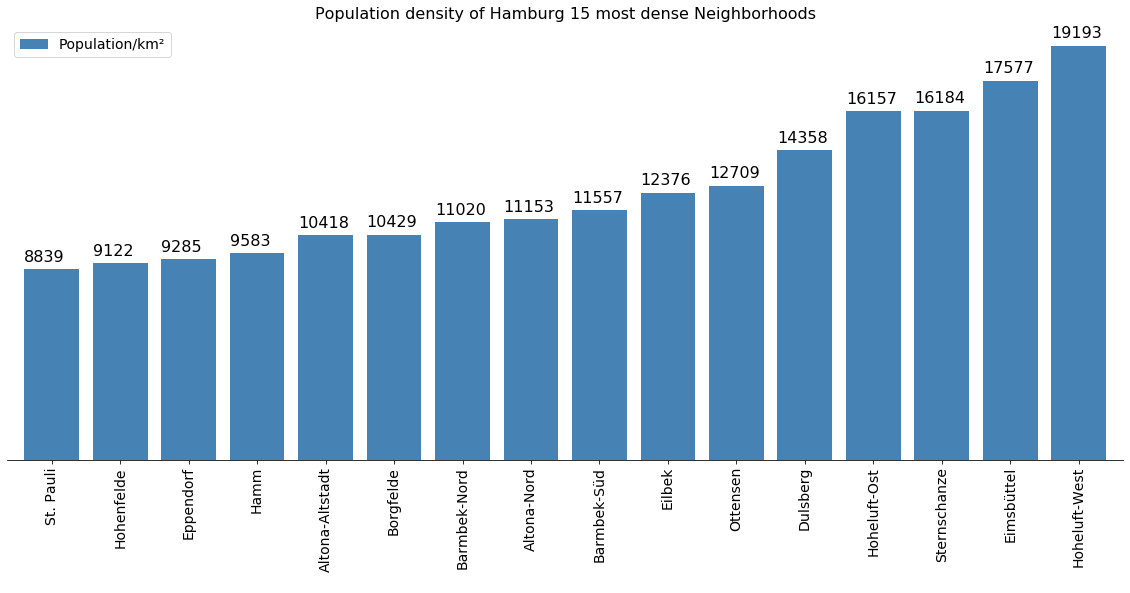

In [41]:
df_pop_15.set_index(['Neighborhood'], inplace=True)
df_pop_15.sort_values(['Population/km²'], ascending=True, axis=0, inplace=True)

ax = df_pop_15.plot(kind='bar',
             width=0.8, 
             color = ['steelblue'],
             fontsize = 14,
             legend=None,
             figsize=(20, 8))

ax.set_xlabel(' ') # add to x-label to the plot
ax.set_title('Population density of Hamburg 15 most dense Neighborhoods', fontsize=16)
ax.legend(fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (x, y + height + 350), size=16)
    
plt.show()

Creating a dataframe with top 15 neighborhood with more establishments in Hamburg

In [42]:
df_bak =hamburg_merged.head(15)

Cleaning the dataframe for plotting and printing the dataframe

In [43]:
df_bak.drop(['Postal Code', 'Latitude','Longitude'], axis=1, inplace=True)
df_bak.reset_index(inplace=True)

df_bak.drop(['index'], axis=1, inplace=True)
df_bak

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Bakery,Café,Total
0,Hoheluft-Ost,1.0,14.0,15
1,Altona-Altstadt,6.0,6.0,12
2,Neustadt,1.0,9.0,10
3,Hoheluft-West,5.0,4.0,9
4,Sternschanze,0.0,5.0,5
5,Eilbek,2.0,3.0,5
6,Sankt Pauli,0.0,5.0,5
7,Eimsbüttel,3.0,2.0,5
8,Sankt Georg,1.0,4.0,5
9,Altstadt,1.0,3.0,4


Setting the columns Bakery and cafe as int

In [44]:
df_bak['Bakery'] = df_bak['Bakery'].astype(int)
df_bak['Café'] = df_bak['Café'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Plotting a bar graphic of the df_bak

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


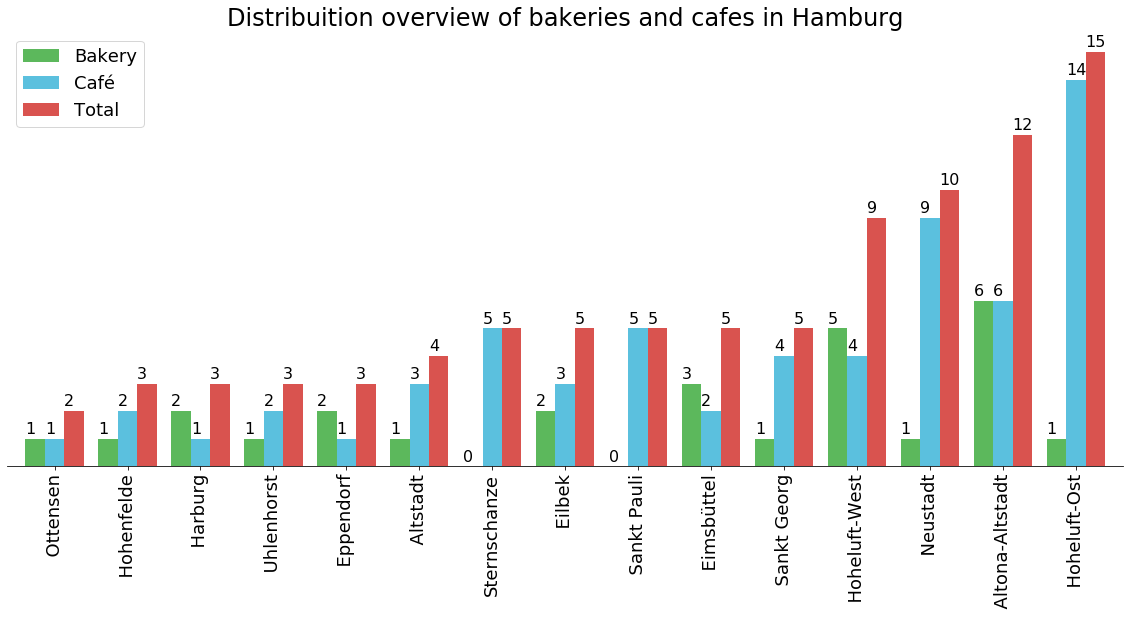

In [45]:
df_bak.set_index(['Neighborhood'], inplace=True)
df_bak.sort_values(['Total'], ascending=True, axis=0, inplace=True)

ax = df_bak.plot(kind='bar',
             width=0.8, 
             color = ['#5cb85c', '#5bc0de', '#d9534f','steelblue'],
             fontsize = 18,
             legend=None,
             figsize=(20, 8))

ax.set_xlabel(' ') # add to x-label to the plot
ax.set_title('Distribuition overview of bakeries and cafes in Hamburg', fontsize=24)
ax.legend(fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (x, y + height + 0.2), size=16)
    
plt.show()